In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from IPython.display import display


In [2]:
MONGO_URI = "mongodb://localhost:27017/"
DB_NAME = "football_data"
MATCHES_COLLECTION = "matches"
EVENTS_COLLECTION = "events"

client = MongoClient(MONGO_URI)
db = client[DB_NAME]



In [29]:
matches = pd.DataFrame(list(db.matches.find()))

events = pd.DataFrame(list(db.events.find().limit(100000)))

In [30]:
print("Matches dataset:")
print(matches.shape)
display(matches.head())

print("Events dataset:")
print(events.shape)
display(events.head())

Matches dataset:
(380, 23)


,_id,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,68133f4011d9bfa0342a1288,3825848,2015-09-23,20:00:00.000,Spain - La Liga,2015/2016,Levante UD,Eibar,2,2,...,None,5,Regular Season,Estadio Ciudad de Valencia,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria,1.1.0,2,2
1,68133f4011d9bfa0342a1289,3825895,2015-09-23,22:00:00.000,Spain - La Liga,2015/2016,Las Palmas,Sevilla,2,0,...,None,5,Regular Season,Estadio de Gran Canaria,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien,1.1.0,2,2
2,68133f4011d9bfa0342a128a,3825894,2016-05-01,18:15:00.000,Spain - La Liga,2015/2016,RC Deportivo La Coruña,Getafe,0,2,...,None,36,Regular Season,Estadio Abanca-Riazor,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén,1.1.0,2,2
3,68133f4011d9bfa0342a128b,3825855,2016-05-02,20:30:00.000,Spain - La Liga,2015/2016,Málaga,Levante UD,3,1,...,None,36,Regular Season,Estadio La Rosaleda,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia,1.1.0,2,2
4,68133f4011d9bfa0342a128c,3825908,2016-05-15,19:00:00.000,Spain - La Liga,2015/2016,Espanyol,Eibar,4,2,...,None,38,Regular Season,RCDE Stadium,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria,1.1.0,2,2


Events dataset:
(100000, 111)


,_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_open_goal,foul_committed_penalty,foul_won_penalty,goalkeeper_punched_out,ball_recovery_offensive,player_off_permanent,goalkeeper_success_in_play,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_redirect
0,68133f4211d9bfa0342a1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68133f4211d9bfa0342a1405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68133f4211d9bfa0342a1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68133f4211d9bfa0342a1407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68133f4211d9bfa0342a1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print("\nMissing values in Matches:")
display(matches.isnull().sum())

print("\nMissing values in Events:")
display(events.isnull().sum())


Missing values in Matches:


match_id         0
match_date       0
kick_off         0
home_team        0
away_team        0
home_score       0
away_score       0
match_week       0
home_managers    0
away_managers    0
dtype: int64


Missing values in Events:


_id                                     0
bad_behaviour_card                  99964
ball_receipt_outcome                96301
ball_recovery_recovery_failure      99805
block_deflection                    99974
                                    ...  
player_off_permanent                99999
goalkeeper_success_in_play          99999
goalkeeper_shot_saved_off_target    99999
shot_saved_off_target               99999
shot_redirect                       99998
Length: 111, dtype: int64

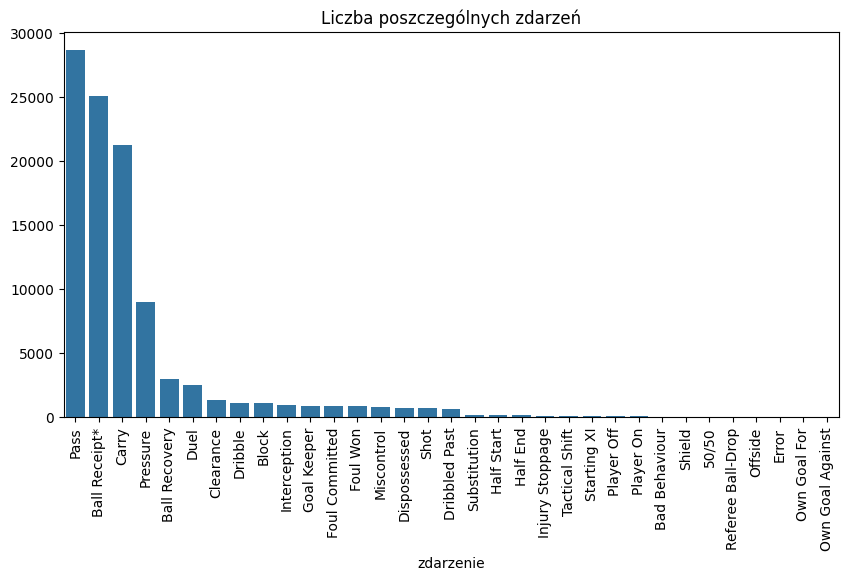

In [31]:
if 'type' in events.columns:
    event_counts = events['type'].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=event_counts.index, y=event_counts.values)
    plt.title('Liczba poszczególnych zdarzeń')
    plt.xlabel('zdarzenie')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Step 1: Calculate detailed goal stats
home_goals_scored = matches.groupby('home_team')['home_score'].sum().rename('home_goals')
away_goals_scored = matches.groupby('away_team')['away_score'].sum().rename('away_goals')
home_goals_conceded = matches.groupby('home_team')['away_score'].sum().rename('home_goals_conceded')
away_goals_conceded = matches.groupby('away_team')['home_score'].sum().rename('away_goals_conceded')

goal_stats = pd.concat([
    home_goals_scored,
    away_goals_scored,
    home_goals_conceded,
    away_goals_conceded
], axis=1)

goal_stats['goals_scored'] = goal_stats['home_goals'] + goal_stats['away_goals']
goal_stats['goals_conceded'] = goal_stats['home_goals_conceded'] + goal_stats['away_goals_conceded']
goal_stats['goal_difference'] = goal_stats['goals_scored'] - goal_stats['goals_conceded']

#pomocnicze tabele do liczenia punktów
home = matches[['home_team', 'home_score', 'away_score']].copy()
home.columns = ['team', 'goals_for', 'goals_against']
home['venue'] = 'home'

away = matches[['away_team', 'away_score', 'home_score']].copy()
away.columns = ['team', 'goals_for', 'goals_against']
away['venue'] = 'away'

results = pd.concat([home, away], ignore_index=True)

results['win'] = results['goals_for'] > results['goals_against']
results['draw'] = results['goals_for'] == results['goals_against']
results['loss'] = results['goals_for'] < results['goals_against']
results['points'] = results['win'] * 3 + results['draw'] * 1

#Łączenie tabel
league_stats = results.groupby('team').agg(
    matches_played=('team', 'count'),
    wins=('win', 'sum'),
    draws=('draw', 'sum'),
    losses=('loss', 'sum'),
    points=('points', 'sum')
)

final_table = league_stats.join(goal_stats)
final_table = final_table.sort_values(by=['points', 'goal_difference', 'goals_scored'], ascending=False)
col_order = ['matches_played','points','goal_difference','wins','draws','losses','goals_scored','goals_conceded','home_goals','away_goals','home_goals_conceded','away_goals_conceded']
final_table = final_table[col_order]
final_table = final_table.reset_index()

display(final_table)


,matches_played,points,goal_difference,wins,draws,losses,goals_scored,goals_conceded,home_goals,away_goals,home_goals_conceded,away_goals_conceded
team,,,,,,,,,,,,
Barcelona,38,91,83,29,4,5,112,29,67,45,14,15
Real Madrid,38,90,76,28,6,4,110,34,70,40,16,18
Atlético Madrid,38,88,45,28,4,6,63,18,33,30,7,11
Villarreal,38,64,9,18,10,10,44,35,26,18,12,23
Athletic Club,38,62,13,18,8,12,58,45,35,23,17,28
Celta Vigo,38,60,-8,17,9,12,51,59,29,22,25,34
Sevilla,38,52,1,14,10,14,51,50,38,13,21,29
Málaga,38,48,3,12,12,14,38,35,26,12,15,20
Real Sociedad,38,48,-3,13,9,16,45,48,22,23,20,28


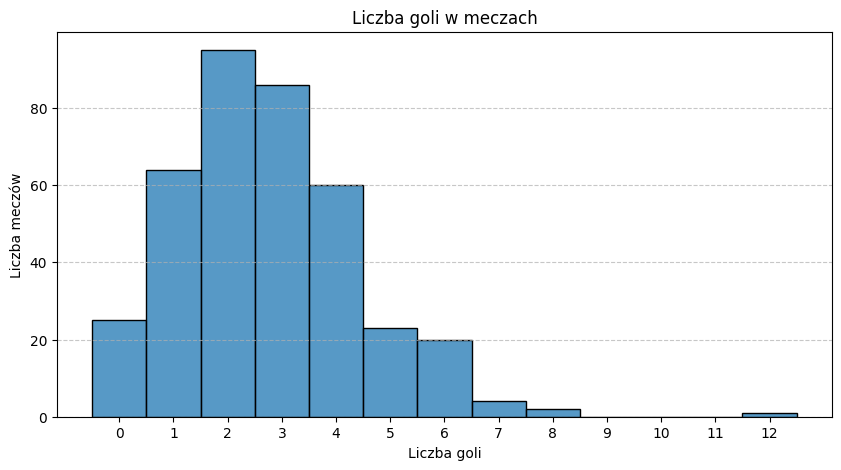

Całkowita liczba goli: 1043 
Średnia liczba goli na mecz: 2.74


In [7]:
matches['total_goals'] = matches['home_score'] + matches['away_score']


plt.figure(figsize=(10, 5))
sns.histplot(matches['total_goals'], bins=range(0, matches['total_goals'].max()+2), discrete=True)
plt.title('Liczba goli w meczach')
plt.xlabel('Liczba goli')
plt.ylabel('Liczba meczów')
plt.xticks(range(0, matches['total_goals'].max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

avg_goals = matches['total_goals'].mean()
print(f"Całkowita liczba goli: {matches['total_goals'].sum()} \nŚrednia liczba goli na mecz: {avg_goals:.2f}")


In [ ]:
# Wyszukaniwanie w bazie danych wszystkich goli
normal_goals_query = {
    "type": "Shot",
    "shot_outcome": "Goal"
}
normal_goals = pd.DataFrame(list(db.events.find(normal_goals_query)))

# Dołączenie goli samobójczych, nie są one traktowane jak strzały
own_goals_query = {
    "type": "Own Goal For"
}
own_goals = pd.DataFrame(list(db.events.find(own_goals_query)))

goals = pd.concat([normal_goals, own_goals], ignore_index=True)

print(goals.shape) #powinno być 1043



(1043, 118)


/tmp/ipykernel_71892/1610967482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_time['display_minute'] = goals_time['minute'] + 1


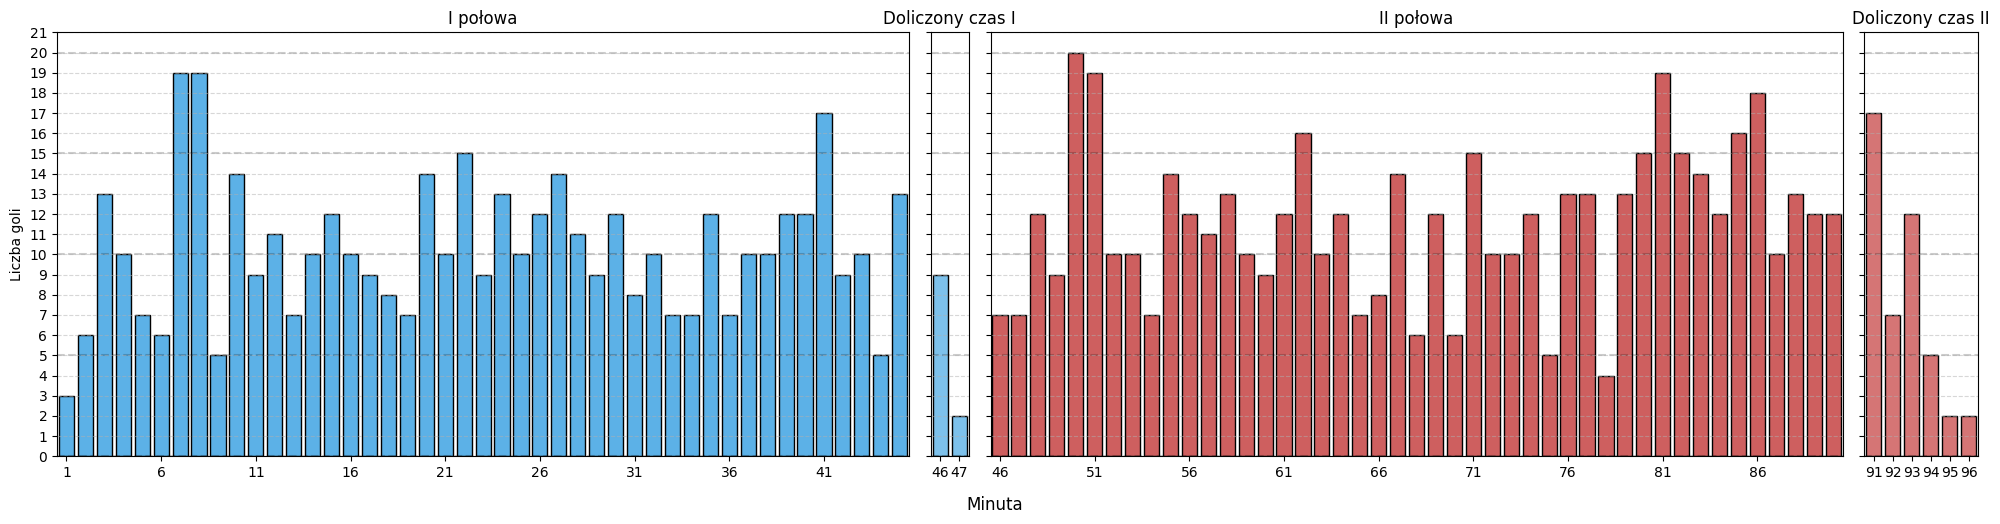

In [41]:
time_cols = [ 'minute', 'period']
goals_time = goals[time_cols]
goals_time['display_minute'] = goals_time['minute'] + 1

first_half = goals_time[(goals['period'] == 1) & (goals_time['minute'] < 45)]
second_half = goals_time[(goals_time['period'] == 2) & (goals_time['minute'] < 90)]
first_half_stoppage = goals_time[(goals['period'] == 1) & (goals_time['minute'] >= 45)]
second_half_stoppage = goals_time[(goals_time['period'] == 2) & (goals_time['minute'] >= 90)]

fig, axes = plt.subplots(
    1, 4, 
    figsize=(20, 5), 
    sharey=True,
    gridspec_kw={'width_ratios': [45, 2, 45, 6]}
)

# I połowa
sns.countplot(
    x='display_minute',
    data=first_half,
    color='#45b6fe',
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('I połowa')
axes[0].set_ylabel('Liczba goli')
axes[0].set_xticks(range(0, 45, 5))

# I połowa doliczony czas
sns.countplot(
    x='display_minute',
    data=first_half_stoppage,
    color='#6ac5fe',
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title('Doliczony czas I')

# II połowa
sns.countplot(
    x='display_minute',
    data=second_half,
    color='#e04c4c',
    edgecolor='black',
    ax=axes[2]
)
axes[2].set_title('II połowa')
axes[2].set_xticks(range(0, 45, 5))

# II połowa doliczony czas
sns.countplot(
    x='display_minute',
    data=second_half_stoppage,
    color='#e56565',
    edgecolor='black',
    ax=axes[3]
)
axes[3].set_title('Doliczony czas II')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
    ax.set_yticks(range(0, int(goals['display_minute'].value_counts().max()) + 2, 1))
    ax.set_xlabel('')
    y_max = ax.get_ylim()[1]
    for y in range(0, int(y_max)+1):
        if y % 5 == 0:
            ax.axhline(y=y, color='black', zorder=1, alpha=0.2, linestyle='--')

fig.text(0.5, -0.02, 'Minuta', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()